## Tumor Detection

### Problem Statement:

To classify patients based on whether they are showing malignant tumor symptoms (M) and people showing beginner tumor symptoms (B).

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data
data = pd.read_csv("C:\Vikram\Data Science\Tumor Detection\Tumor_Detection.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The id column contains partient IDs, which is of no use in the further analysis. So we will remove the columns and keep rest of the columns.

In [3]:
# Dropping "id" column
data.drop('id', axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Checking unique values in "dignosis" column
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

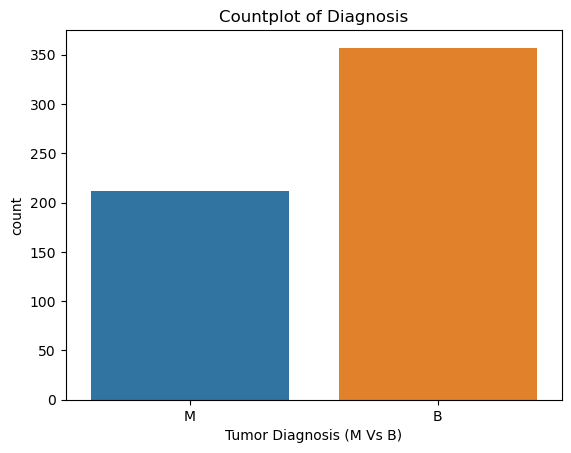

In [5]:
# Plotting countplot
sns.countplot(data, x="diagnosis")
plt.xlabel("Tumor Diagnosis (M Vs B)")
plt.title("Countplot of Diagnosis")
plt.show()

Since the dignosis column is a categorical column and it contains either M (Malignant Tumor patiests) and B (Beginner Tumor patients), we will convert the categorical column into a numerical column. This is because, while fitting machine learnning algorithm usinh python, it only considers numeric columns and not the categirical column like "diagnosis" column.

In [6]:
# Labeling M as 1 and B as 0
data.diagnosis = data.diagnosis.map({'M':1, 'B':0})
data.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

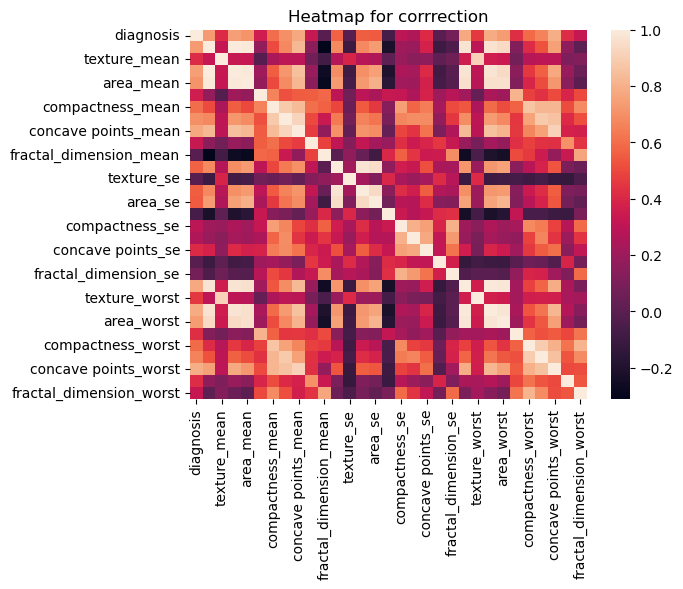

In [7]:
# Plotting heatmap
sns.heatmap(data.corr())
plt.title("Heatmap for corrrection")
plt.show()

The above heatmap better visualizes the correction between all the feature variables with the variable diagnosis. Almost all the feature variables are highly correlated to the diagnosis, it is a good indication of moving forward to model the machine learning algorithm for tumor detection.

Let us now split the data into features and response. Features are the variables used to predict the response variable, while response variable is the variable which needs to predict.

Here, we will use random forest algorithm for tumor detection problem.

In [8]:
# Features
X = data.drop('diagnosis', axis=1)
# Response
y = data['diagnosis']

Before we move ahead, let us split the entire data into training dataset and test dataset. We will use train dataset to fit the random forest algorithm and then we will use test dataset to test the accuracy of the fitted model.

Splitting the dataset into train and test ensures that both the dataset are mutually exclusive.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [11]:
from sklearn.metrics import accuracy_score
rfc.fit(X_train, y_train)
y_pred_test = rfc.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9649122807017544

This suggest that the random forest algorithm correctly classifies patients showing malignant tumor symptoms (M) and people showing beginner tumor symptoms (B) with **96.49%** accuracy. 

[You might get different value for accuracy score when you run this code on your system].

**Important Note:**

I have applied the random forest algorithm on standardized dataset, that means, I have fitted the model using **StandardScalar()** operation from **sklearn.preprocessing** module and checked the results. Both were giving the exactly same results, so I used the original dataset without standardized dataset to make it simple.

Let us check few results from the fitted model. In the below table, "Actual" column gives the actual status of the patients while "Predicted" column gives the predicted status by the random forest model. 1 denotes the patient has malignant tumor symptomes and 0 denotes the patient has beginner tumor symptomes.

In [12]:
# Creating dataframe for Actual and Predicted values
pred = pd.DataFrame(y_pred_test)
act = pd.DataFrame(y_test)
pred.set_index(act.index, inplace=True)
new = pd.concat([act, pred], axis=1)
new.columns = ["Actual","Predicted"]
new.head(10)

,Actual,Predicted
512,1,1
457,0,0
439,0,0
298,0,0
37,0,0
515,0,0
382,0,0
310,0,0
538,0,0
345,0,0


The dignonal values in the below confusion matrix gives the number of times the fitted random forest algorithm correctly classified the patients into their respective groups (that is, M and B).

In [13]:
# Getting confusion matrix for better understanding
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[103,   5],
       [  1,  62]], dtype=int64)

Let us now make some predictions on a sample data set as follows.

We collected 4 samples from the orginal dataset corresponding to the indices 536, 537, 538 and 539. The patients 536 and 537 shows malignant tumor (that is, 1) and the patients 538 and 539 shows beginner tumor (that is, 0).

In [14]:
X1 = np.array([[20.55,20.86,137.8,1308,0.1046,0.1739,0.2085,0.1322,0.2127,0.06251,0.6986,0.9901,4.706,87.78,0.004578,0.02616,0.04005,0.01421,0.01948,0.002689,24.3,25.48,160.2,1809,0.1268,0.3135,0.4433,0.2148,0.3077,0.07569],
               [14.27,22.55,93.77,629.8,0.1038,0.1154,0.1463,0.06139,0.1926,0.05982,0.2027,1.851,1.895,18.54,0.006113,0.02583,0.04645,0.01276,0.01451,0.003756,15.29,34.27,104.3,728.3,0.138,0.2733,0.4234,0.1362,0.2698,0.08351],
               [11.69,24.44,76.37,406.4,0.1236,0.1552,0.04515,0.04531,0.2131,0.07405,0.2957,1.978,2.158,20.95,0.01288,0.03495,0.01865,0.01766,0.0156,0.005824,12.98,32.19,86.12,487.7,0.1768,0.3251,0.1395,0.1308,0.2803,0.0997],
               [7.729,25.49,47.98,178.8,0.08098,0.04878,0,0,0.187,0.07285,0.3777,1.462,2.492,19.14,0.01266,0.009692,0,0,0.02882,0.006872,9.077,30.92,57.17,248,0.1256,0.0834,0,0,0.3058,0.09938]])
X1 = X1.reshape(4,-1)

In [15]:
rfc.predict(X1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 0, 0], dtype=int64)

This shows that the model correctly predicted all the 4 patients into their respective classes. 

### Observations:

The confusion matrix shows that, off-diagonal values are incorrectly classifies. That means, among the test sample of 171 patients the random forest model correctly predicted **165** (=105+60) patients into their respective classes, on the other hand, the model incorrectly predicted **6** (=3+3) patients into different classes.

[You might get different values in confusion matrix when you run this code on your system].

### Conclusion:

We can use the fitted random forest algorithm for tumor detection of patiests given the values for rest of the 30 variables.